In [2]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from utils import *
from genetic_new import genetic_alg_func

Agent position: (4, 1)
Target position: (7, 14)
Target raggiunto nella generazione 28


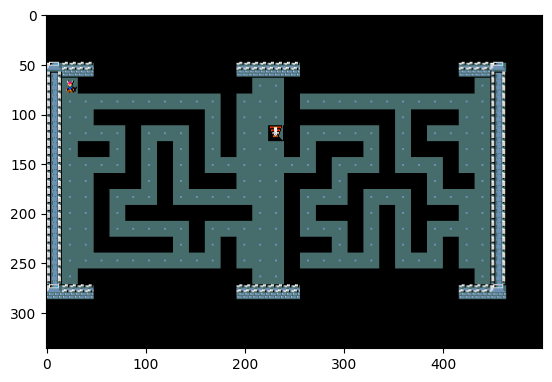

In [28]:
#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
SEED = 22 
env.seed(SEED)
state = env.reset()

coordinates = [500, 500]

plt.imshow(state['pixel'][:coordinates[0], :coordinates[1]])

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

#game_map = np.array(game_map)

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Add Game Over function
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Add ictory function
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)

population_size = 1000 #number of possible created path in our dictionary
generations = 1000
mutation_rate = 0.1 #probability of mutation from one path to another
max_steps = 20

list_paths = genetic_alg_func(game_map, start, target, population_size, generations, mutation_rate, max_steps)

In [29]:
for idx, path in enumerate(list_paths):
   print(f"Path {idx + 1}: {path}")

Path 1: [(4, 1), (5, 1), (5, 2), (5, 1), (6, 1), (6, 2), (5, 2), (6, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 10), (7, 10)]
Path 2: [(4, 1), (5, 1), (5, 2), (5, 1), (4, 1), (5, 1), (4, 1), (5, 1), (5, 2), (5, 1), (5, 2), (6, 2), (6, 1), (7, 1), (6, 1), (5, 7), (5, 8), (5, 9), (5, 10), (6, 10), (7, 10)]
Path 3: [(4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 3), (7, 4), (8, 4), (7, 4), (8, 4), (6, 1), (7, 1), (6, 1), (5, 7), (5, 8), (5, 9), (5, 10), (6, 10), (7, 10)]
Path 4: [(4, 1), (5, 1), (4, 1), (5, 1), (5, 2), (5, 5), (5, 6), (6, 2), (7, 2), (6, 2), (6, 1), (7, 1), (7, 2), (7, 3), (7, 2), (7, 3), (7, 4), (5, 9), (5, 10), (6, 10), (7, 10)]
Path 5: [(4, 1), (5, 1), (5, 2), (6, 2), (5, 2), (5, 1), (6, 1), (6, 2), (7, 2), (5, 3), (5, 2), (5, 3), (5, 8), (5, 9), (5, 10), (6, 10), (5, 10), (6, 10), (7, 10), (6, 10), (7, 10)]
Path 6: [(4, 1), (5, 1), (6, 1), (5, 1), (4, 1), (5, 1), (7, 1), (7, 1), (7, 2), (7, 3), (7, 2),

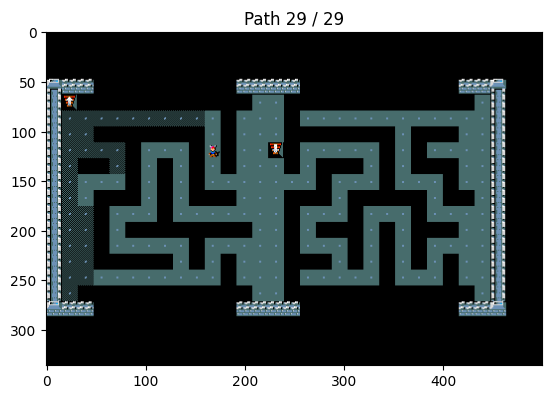

In [30]:
# Iterate over each path in list_paths
for idx, path in enumerate(list_paths):  # 'idx' will be the index (starting from 0)
    try:
        # Set the title to indicate the path number
        plt.title(f"Path {idx + 1} / {len(list_paths)}")  # Index starts from 0, so we add 1 to make it human-readable

        # Reset dell'ambiente per ogni nuovo percorso
        env.seed(SEED)
        state = env.reset()  # Reset dell'ambiente
        game_map = state['chars']
        game = state['pixel']
        game_stats = state['blstats']
        game_mex = state['message']
        
        # Posiziona il giocatore allo start ogni volta
        player_location = get_player_location(game_map)
        target_location = get_target_location(game_map)

        # Convert the path to actions (if necessary)
        actions = actions_from_path(start, path[1:])

        # Visualize the current path
        image = plt.imshow(game[:coordinates[0], :coordinates[1]])
        for action in actions:
            s, _, done, _ = env.step(action)  # `done` tells us if the simulation is over
            image.set_data(s['pixel'][:coordinates[0], :coordinates[1]])

            # If the simulation is over
            if done:
                # Check if the player is dead
                if hp == 0:
                    display_game_over()
                else:
                    display_victory()
                break  # Stop the simulation for the current path

            # Update the game visualization
            display.display(plt.gcf())
            display.clear_output(wait=True)
    except Exception as e:
        continue